<a href="https://colab.research.google.com/github/aroraaastha/machine-learning/blob/main/Copy_of_Perceptron_Model_for_AND_Gate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [2]:
class Perceptron:
  def __init__(self, ip, lr, epochs):
    self.w = np.zeros((ip+1,1))
    print(self.w)
    self.lr = lr
    self.epochs = epochs
    self.loss_lst = []

  #It is a step activation function
  def activation(self, z):
    return 1 if z>=0 else 0

  def predict(self, x):
    z = self.w.T.dot(x)
    a = self.activation(z)
    return a

  def fit(self, X, Y):
    for i in range(self.epochs):
      L = 0
      for j in range(Y.shape[0]):
        x = np.insert(X[j], 0, 1)
        x = x.reshape((3,1))
        y = self.predict(x)
        loss = Y[j]-y
        L += loss**2
        self.w += self.lr * loss * x
      L = L/4
      self.loss_lst.append(L)

In [7]:
import numpy as np
if __name__ == '__main__':
  X = np.array([
                [0,0],
                [0,1],
                [1,0],
                [1,1]
  ])
  Y = np.array([0,1,1,0])

  model = Perceptron(ip = 2, lr = 0.001, epochs = 100)
  model.fit(X,Y)
  print(model.w)

[[0.]
 [0.]
 [0.]]
[[ 0.   ]
 [-0.001]
 [ 0.   ]]


Final weights: [-0.2  0.2  0.1]


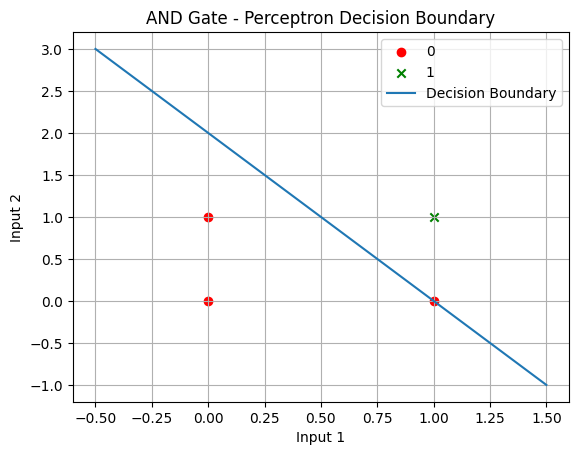

In [8]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, ip, lr=0.01, epochs=100):
        self.lr = lr
        self.epochs = epochs
        self.w = np.zeros(ip + 1)  # +1 for bias

    def activation(self, x):
        return 1 if x >= 0 else 0

    def fit(self, X, Y):
        for _ in range(self.epochs):
            for xi, target in zip(X, Y):
                z = np.dot(xi, self.w[1:]) + self.w[0]
                y_pred = self.activation(z)
                error = target - y_pred
                self.w[1:] += self.lr * error * xi
                self.w[0] += self.lr * error

    def predict(self, X):
        return [self.activation(np.dot(xi, self.w[1:]) + self.w[0]) for xi in X]

if __name__ == '__main__':
    # AND gate input and output
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])
    Y = np.array([0, 0, 0, 1])  # AND gate

    # Train perceptron
    model = Perceptron(ip=2, lr=0.1, epochs=100)
    model.fit(X, Y)

    # Print final weights
    print("Final weights:", model.w)

    # Plotting
    for i, x in enumerate(X):
        if Y[i] == 0:
            plt.scatter(x[0], x[1], marker='o', color='red', label='0' if i == 0 else "")
        else:
            plt.scatter(x[0], x[1], marker='x', color='green', label='1' if i == 3 else "")

    # Decision boundary: w0 + w1*x + w2*y = 0 => y = -(w1/w2)x - (w0/w2)
    x_vals = np.linspace(-0.5, 1.5, 100)
    if model.w[2] != 0:
        y_vals = -(model.w[1] / model.w[2]) * x_vals - (model.w[0] / model.w[2])
        plt.plot(x_vals, y_vals, label='Decision Boundary')
    else:
        plt.axvline(-model.w[0] / model.w[1], label='Decision Boundary')

    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.title('AND Gate - Perceptron Decision Boundary')
    plt.legend()
    plt.grid(True)
    plt.show()


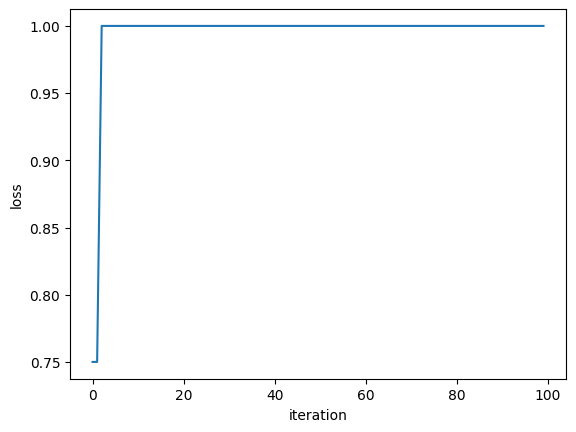

In [ ]:
import matplotlib.pyplot as plt
x_axis = [int(x) for x in range(100)]
y_axis = model.loss_lst
plt.plot(x_axis, y_axis)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

Final weights: [-0.1  0.1  0.1]


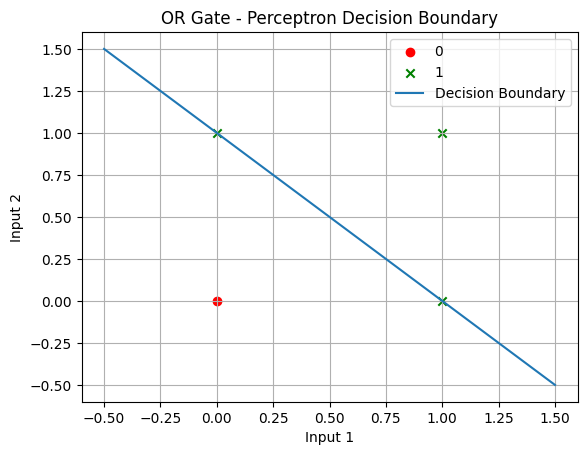

In [9]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, ip, lr=0.01, epochs=100):
        self.lr = lr
        self.epochs = epochs
        self.w = np.zeros(ip + 1)  # +1 for bias

    def activation(self, x):
        return 1 if x >= 0 else 0

    def fit(self, X, Y):
        for _ in range(self.epochs):
            for xi, target in zip(X, Y):
                z = np.dot(xi, self.w[1:]) + self.w[0]
                y_pred = self.activation(z)
                error = target - y_pred
                self.w[1:] += self.lr * error * xi
                self.w[0] += self.lr * error

    def predict(self, X):
        return [self.activation(np.dot(xi, self.w[1:]) + self.w[0]) for xi in X]

if __name__ == '__main__':
    # OR gate input and output
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])
    Y = np.array([0, 1, 1, 1])  # OR gate

    # Train perceptron
    model = Perceptron(ip=2, lr=0.1, epochs=100)
    model.fit(X, Y)

    # Print final weights
    print("Final weights:", model.w)

    # Plotting
    for i, x in enumerate(X):
        if Y[i] == 0:
            plt.scatter(x[0], x[1], marker='o', color='red', label='0' if i == 0 else "")
        else:
            plt.scatter(x[0], x[1], marker='x', color='green', label='1' if i == 1 else "")

    # Decision boundary
    x_vals = np.linspace(-0.5, 1.5, 100)
    if model.w[2] != 0:
        y_vals = -(model.w[1] / model.w[2]) * x_vals - (model.w[0] / model.w[2])
        plt.plot(x_vals, y_vals, label='Decision Boundary')
    else:
        plt.axvline(-model.w[0] / model.w[1], label='Decision Boundary')

    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.title('OR Gate - Perceptron Decision Boundary')
    plt.legend()
    plt.grid(True)
    plt.show()
